# Timing results for 2D Pressure Poisson Solver
These are the results for the different methods of solving this matrix on a 4 level mesh with the divide 4 option.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)

# Full Matrix with Hypre (1)
This section is the timing results for solving the full matrix with a 4 level mesh using Hypre. This matrix has 34,078,720 degrees of freedom.

In [3]:
DOF = 34078720
Petsc_Hypre_Full_Cores = np.array([1,2])
Petsc_Hypre_Full_Iterations = np.array([34,])
Petsc_Hypre_Full_Residual = np.array([7.9976445136954e-11])
Petsc_Hypre_Full_Error = np.array([5.7477243214081e-05])
Petsc_Hypre_Full_Domain = np.array([9.3102967615])
Petsc_Hypre_Full_Matrix = np.array([13.032011544])
Petsc_Hypre_Full_Petsc = np.array([46.4756566226])
Petsc_Hypre_Full_LSS = np.array([59.5076796164])
Petsc_Hypre_Full_LinS = np.array([476.6024337533])
Petsc_Hypre_Full_CS = np.array([476.6024388832])
Petsc_Hypre_Full_DegF = (DOF)/Petsc_Hypre_Full_CS/Petsc_Hypre_Full_Cores
Petsc_Hypre_Full_Eff = Petsc_Hypre_Full_CS[0]/(Petsc_Hypre_Full_CS*Petsc_Hypre_Full_Cores)

d = {"Cores": Petsc_Hypre_Full_Cores,"Iterations": Petsc_Hypre_Full_Iterations,"Residual": Petsc_Hypre_Full_Residual,
    "Error": Petsc_Hypre_Full_Error,"Domain Initialization": Petsc_Hypre_Full_Domain,"Matrix Formation": Petsc_Hypre_Full_Matrix,
    "Hypre Setup": Petsc_Hypre_Full_Petsc,"Linear System Setup": Petsc_Hypre_Full_LSS,"Linear Solve": Petsc_Hypre_Full_LinS,
    "Complete Solve": Petsc_Hypre_Full_CS,"Efficiency": Petsc_Hypre_Full_Eff,"Degrees of Freedom Per Time Per Core": Petsc_Hypre_Full_DegF}
df1 =  pd.DataFrame(data = d)
df1 = df1[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","Hypre Setup",
         "Linear System Setup","Linear Solve","Complete Solve","Efficiency","Degrees of Freedom Per Time Per Core"]]
nform = {"Error" : "{:6.2e}".format, "Residual" : "{:6.2e}".format}

df1.style.set_caption("Degrees of freedom {:,}".format(DOF)).background_gradient(cmap=cm).format(nform)
# display(HTML(df1.to_html(index=False)))

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,Hypre Setup,Linear System Setup,Linear Solve,Complete Solve,Efficiency,Degrees of Freedom Per Time Per Core
0,1,34,8.00e-11,5.75e-05,9.3103,13.032,46.4757,59.5077,476.602,476.602,1,71503.5


/home/brenton/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/home/brenton/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:584: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale
/home/brenton/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:586: RuntimeWarning: divide by zero encountered in true_divide
  c = (c.T/scale).T  # broadcast scale coefficients
/home/brenton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':
/home/brenton/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


<function matplotlib.pyplot.show>

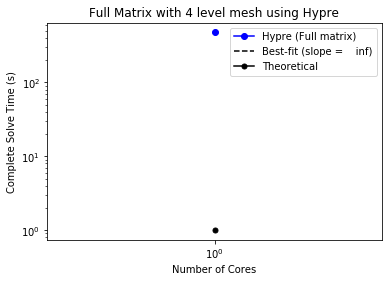

In [4]:
x = Petsc_Hypre_Full_Cores
y = Petsc_Hypre_Full_CS


plt.plot(x,y,"bo-",label="Hypre (Full matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Full Matrix with 4 level mesh using Hypre")

c = np.polyfit(np.log(x),np.log(y),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

s = "Best-fit (slope = {:6.2f})".format(c[0])
plt.loglog(x,np.exp(np.polyval(c,np.log(x))),'k--',label=s)

ct = np.array([-1,c[1]])
plt.loglog(x,np.exp(np.polyval(ct,np.log(x))),'.-',label="Theoretical",color='k',markersize=10)


plt.legend()
plt.show

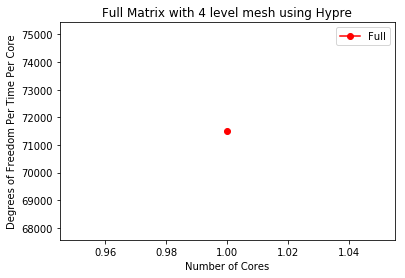

In [5]:
plt.plot(Petsc_Hypre_Full_Cores,Petsc_Hypre_Full_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom Per Time Per Core")
plt.xlabel("Number of Cores")
plt.title("Full Matrix with 4 level mesh using Hypre")
plt.legend()

# Schur Matrix with Hypre (3)

This section is the timing results for solving the schur matrix using Hypre. This matrix has 34,078,720 degrees of freedom.

In [8]:
DOF = 34078720
Petsc_Hypre_Schur_Cores = np.array([1,2,4,8,16,32,64])
Petsc_Hypre_Schur_Iterations = np.array([18,18,17,17,17,17,17])
Petsc_Hypre_Schur_Residual = np.array([2.1422726188584e-10,3.2161565985030e-10,2.7612674597579e-10,3.6429603151764e-10,
                                      3.4940500168352e-10,3.0469687491220e-10,3.5977521713133e-10])
Petsc_Hypre_Schur_Error = np.array([5.7477238317432e-05,5.7477239548413e-05,5.7477238637187e-05,5.7477238433841e-05,
                                   5.7477238995146e-05,5.7477239111240e-05,5.7477239589618e-05])
Petsc_Hypre_Schur_Domain = np.array([9.4445950346,5.2305916603,2.6958817151,1.3871310527,0.7516239067,0.3453087533,
                                    0.1802511932])
Petsc_Hypre_Schur_Matrix = np.array([40.0887125916,42.7230843016,81.2467002987,156.3588543868,361.3782361214,
                                    1.0041248196,0.5388229892])
Petsc_Hypre_Schur_Petsc = np.array([30.6902516082,31.2512701374,41.7367549559,64.0581156817,44.866301632,1.4652302183,
                                   3.961427355])
Petsc_Hypre_Schur_LSS = np.array([70.7789770334,73.9743770872,122.9834756936,220.416994944,406.2445835313,2.4694171135,
                                 4.5003341666])
Petsc_Hypre_Schur_LinS = np.array([126.3492145385,63.8764787061,37.5105962078,24.7682500331,19.0830590801,18.4242870962,
                                  8.0836519599])
Petsc_Hypre_Schur_PatS = np.array([0.9870345647,0.550425772,0.3183192302,0.1909717065,0.1378947459,0.0932485796,
                                  0.0663816566])
Petsc_Hypre_Schur_CS = np.array([127.3362603822,64.4269330189,37.83016898,24.9670273807,19.221335037,18.5241706263,
                                8.1564960435])
Petsc_Hypre_Schur_DegF = (DOF)/Petsc_Hypre_Schur_CS/Petsc_Hypre_Schur_Cores
Petsc_Hypre_Schur_Eff = Petsc_Hypre_Schur_CS[0]/(Petsc_Hypre_Schur_CS*Petsc_Hypre_Schur_Cores)

d = {"Cores": Petsc_Hypre_Schur_Cores,"Iterations": Petsc_Hypre_Schur_Iterations,"Residual": Petsc_Hypre_Schur_Residual,
    "Error": Petsc_Hypre_Schur_Error,"Domain Initialization": Petsc_Hypre_Schur_Domain,"Matrix Formation": Petsc_Hypre_Schur_Matrix,
    "Hypre Setup": Petsc_Hypre_Schur_Petsc,"Linear System Setup": Petsc_Hypre_Schur_LSS,"Linear Solve": Petsc_Hypre_Schur_LinS,
    "Patch Solve": Petsc_Hypre_Schur_PatS,"Complete Solve": Petsc_Hypre_Schur_CS,"Efficiency": Petsc_Hypre_Schur_Eff,
     "Degrees of Freedom Per Time Per Core": Petsc_Hypre_Schur_DegF}
df3 =  pd.DataFrame(data = d)
df3 = df3[["Cores","Iterations","Residual","Error","Domain Initialization","Matrix Formation","Hypre Setup",
         "Linear System Setup","Linear Solve","Patch Solve","Complete Solve","Efficiency","Degrees of Freedom Per Time Per Core"]]
nform = {"Error" : "{:6.2e}".format, "Residual" : "{:6.2e}".format}

df3.style.set_caption("Degrees of freedom {:,}".format(DOF)).background_gradient(cmap=cm).format(nform)
# display(HTML(df1.to_html(index=False)))

,Cores,Iterations,Residual,Error,Domain Initialization,Matrix Formation,Hypre Setup,Linear System Setup,Linear Solve,Patch Solve,Complete Solve,Efficiency,Degrees of Freedom Per Time Per Core
0,1,18,2.14e-10,5.75e-05,9.4446,40.0887,30.6903,70.779,126.349,0.987035,127.336,1,267628
1,2,18,3.22e-10,5.75e-05,5.23059,42.7231,31.2513,73.9744,63.8765,0.550426,64.4269,0.988222,264476
2,4,17,2.76e-10,5.75e-05,2.69588,81.2467,41.7368,122.983,37.5106,0.318319,37.8302,0.841499,225209
3,8,17,3.64e-10,5.75e-05,1.38713,156.359,64.0581,220.417,24.7683,0.190972,24.967,0.637522,170619
4,16,17,3.49e-10,5.75e-05,0.751624,361.378,44.8663,406.245,19.0831,0.137895,19.2213,0.414046,110810
5,32,17,3.05e-10,5.75e-05,0.345309,1.00412,1.46523,2.46942,18.4243,0.0932486,18.5242,0.214814,57490.3
6,64,17,3.60e-10,5.75e-05,0.180251,0.538823,3.96143,4.50033,8.08365,0.0663817,8.1565,0.243932,65282.9


<function matplotlib.pyplot.show>

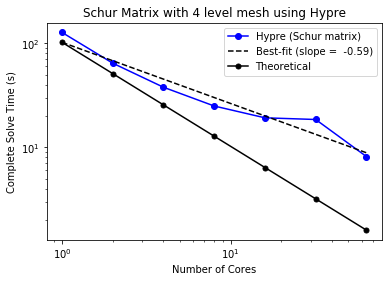

In [9]:
x = Petsc_Hypre_Schur_Cores
y = Petsc_Hypre_Schur_CS


plt.plot(x,y,"bo-",label="Hypre (Schur matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Schur Matrix with 4 level mesh using Hypre")

c = np.polyfit(np.log(x),np.log(y),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

s = "Best-fit (slope = {:6.2f})".format(c[0])
plt.loglog(x,np.exp(np.polyval(c,np.log(x))),'k--',label=s)

ct = np.array([-1,c[1]])
plt.loglog(x,np.exp(np.polyval(ct,np.log(x))),'.-',label="Theoretical",color='k',markersize=10)


plt.legend()
plt.show

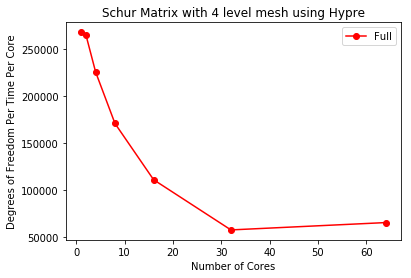

In [10]:
plt.plot(Petsc_Hypre_Schur_Cores,Petsc_Hypre_Schur_DegF,"ro-",label="Full")
plt.ylabel("Degrees of Freedom Per Time Per Core")
plt.xlabel("Number of Cores")
plt.title("Schur Matrix with 4 level mesh using Hypre")
plt.legend()

# Comparison of Full vs Schur solve

/home/brenton/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:584: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale
/home/brenton/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:586: RuntimeWarning: divide by zero encountered in true_divide
  c = (c.T/scale).T  # broadcast scale coefficients
/home/brenton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RankWarning: Polyfit may be poorly conditioned
  from ipykernel import kernelapp as app
/home/brenton/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:680: RuntimeWarning: invalid value encountered in multiply
  y = y * x + p[i]


<function matplotlib.pyplot.show>

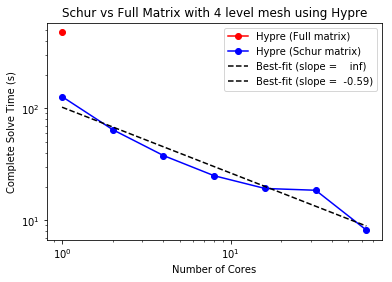

In [12]:
xf = Petsc_Hypre_Full_Cores
yf = Petsc_Hypre_Full_CS
xs = Petsc_Hypre_Schur_Cores
ys = Petsc_Hypre_Schur_CS


plt.plot(xf,yf,"ro-",label="Hypre (Full matrix)")
plt.plot(xs,ys,"bo-",label="Hypre (Schur matrix)")
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Complete Solve Time (s)")
plt.xlabel("Number of Cores")
plt.title("Schur vs Full Matrix with 4 level mesh using Hypre")

cf = np.polyfit(np.log(xf),np.log(yf),1)
cs = np.polyfit(np.log(xs),np.log(ys),1)
#  c = np.polyfit(np.log(x[:-2]),np.log(y[-2]),1)
#  Take out points for slope

sf = "Best-fit (slope = {:6.2f})".format(cf[0])
ss = "Best-fit (slope = {:6.2f})".format(cs[0])
plt.loglog(xf,np.exp(np.polyval(cf,np.log(xf))),'k--',label=sf)
plt.loglog(xs,np.exp(np.polyval(cs,np.log(xs))),'k--',label=ss)


plt.legend()
plt.show